
# Medical Insurance Expense




## Installing Spark

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q http://apache.osuosl.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz

!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [95.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelea

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("finance").getOrCreate()

sc = spark.sparkContext

## Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Uploading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df=spark.read.csv('datasets_13720_18513_insurance.csv',inferSchema=True, header=True)

In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [ ]:
df.show()

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 60|female| 25.84|       0|    no|northwest|28923.13692|
| 25|  male| 26.22|       0|    no|northeast|  2721.3208|
| 62|female| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  male|  34.4|       0|    no|southwest|   1826.843|
| 56|female| 39.82|       0|    no|southeast| 11090.7178|
| 27|  male| 4

In [ ]:
df.describe().show()

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|30.663396860986538|  1.0949177877429|  null|     null|13270.422265141257|
| stddev|14.049960379216147|  null| 6.098186911679012|1.205492739781914|  null|     null|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    max|                64|  male|             53.13|                5|   yes|southwest|       63770.42801|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+



In [ ]:
df.count()

1338

### Checking for Null Values

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---+---+--------+------+------+-------+
|age|sex|bmi|children|smoker|region|charges|
+---+---+---+--------+------+------+-------+
|  0|  0|  0|       0|     0|     0|      0|
+---+---+---+--------+------+------+-------+



### EDA

In [ ]:
data = df.toPandas()

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Univariate Analysis

> For the plot it can be inferred that the Age does not show skewness



Text(0.5, 1.0, 'Age Distribution')

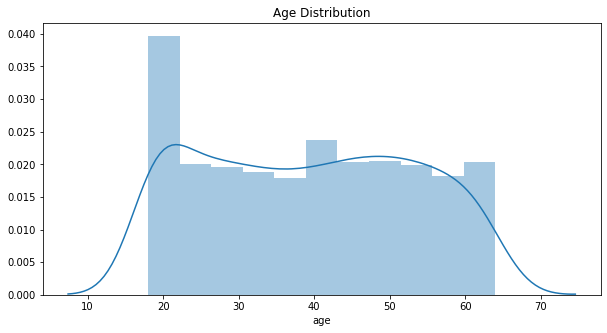

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['age'])
plt.tight_layout
plt.title("Age Distribution")



> The histogram shows that male and female in the dataset are almost equal



Text(0.5, 1.0, 'Sex Count')

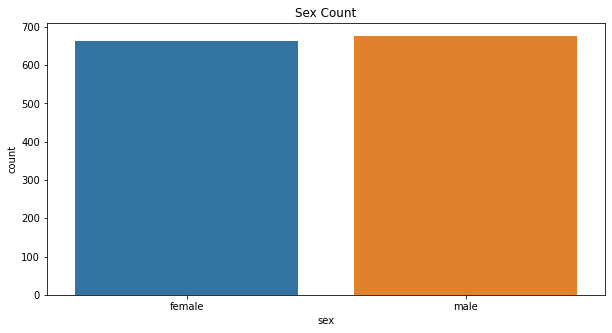

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['sex'])

plt.tight_layout
plt.title("Sex Count")



> BMI is normally distributed



Text(0.5, 1.0, 'BMI Distribution')

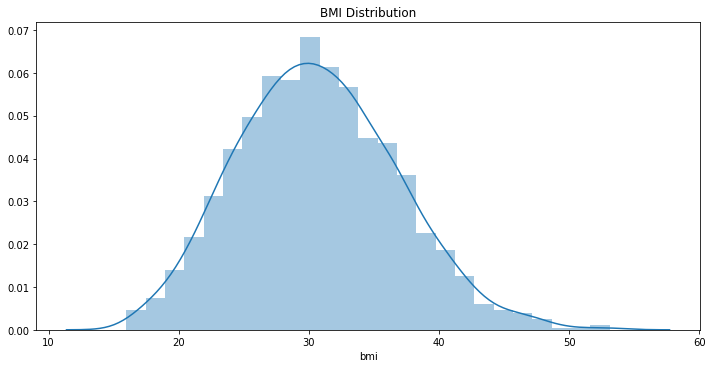

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['bmi'])

plt.tight_layout()
plt.title("BMI Distribution")



> The histogram shows that insurance covered for no. of childern is decreasing from 0 - 6



Text(0.5, 1.0, 'No of Children')

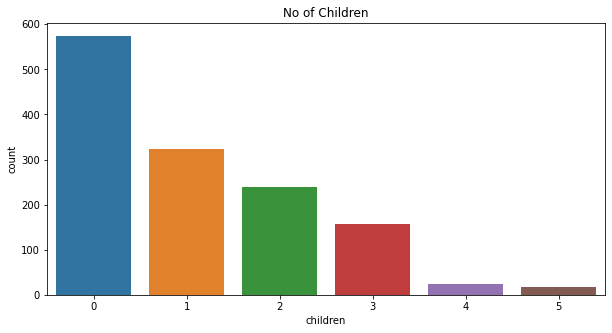

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['children'])

plt.tight_layout
plt.title("No of Children")


> The no of smokers is less as compared to non-smokers in the dataset





Text(0.5, 1.0, 'Smokers Vs non-Smokers')

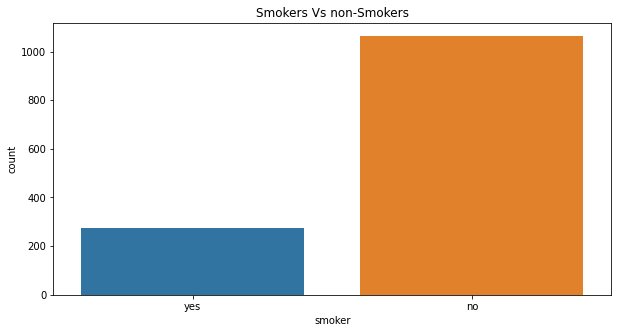

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['smoker'])

plt.tight_layout
plt.title("Smokers Vs non-Smokers")


> The dataset is almost equal in terms of region



Text(0.5, 1.0, 'Region Count')

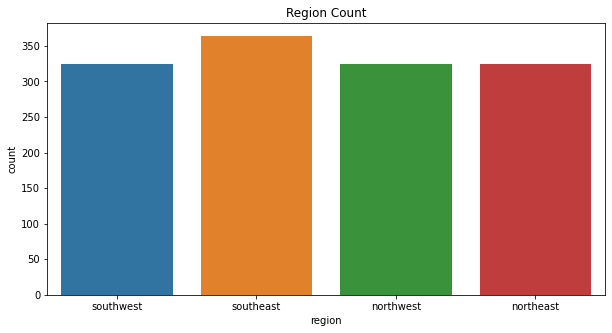

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['region'])

plt.tight_layout
plt.title("Region Count")



> The distribution for the Charges is skewed. Moreover in the second plot after using the log values the charges distribution looks similar to normal distribution to an extent



Text(0.5, 1.0, 'Medical Charges Distribution Using LOG Transformation')

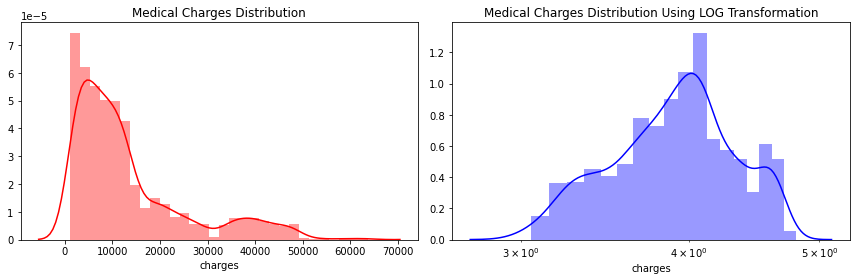

In [ ]:
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.distplot(data['charges'], color = 'r')
plt.title("Medical Charges Distribution")

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']), color = 'b')

ax.set_xscale('log')
plt.tight_layout()
plt.title("Medical Charges Distribution Using LOG Transformation")

## Bivariate Analysis


> Trend shows that as the age increases the charges also increases



Text(0.5, 1.0, 'Age Vs Medical Charges')

<Figure size 864x360 with 0 Axes>

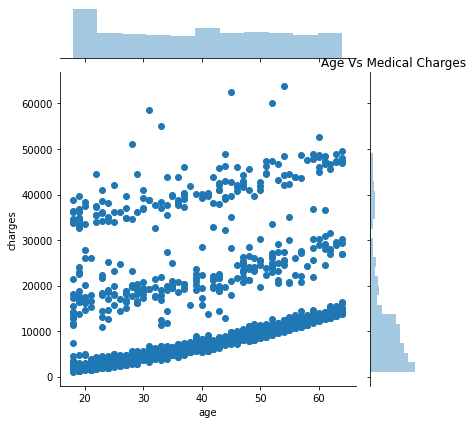

In [ ]:
plt.figure(figsize=(12,5))
sns.jointplot(x='age', y='charges', data=data)


plt.tight_layout()
plt.title("Age Vs Medical Charges")



> The insurance charge for male and female is approximately in same range. 

> Gender seems to have next to no influence on the charge as the mean medical expenses of both sexes seems nearly equal.





Text(0.5, 1.0, 'Sex Vs Medical Charges')

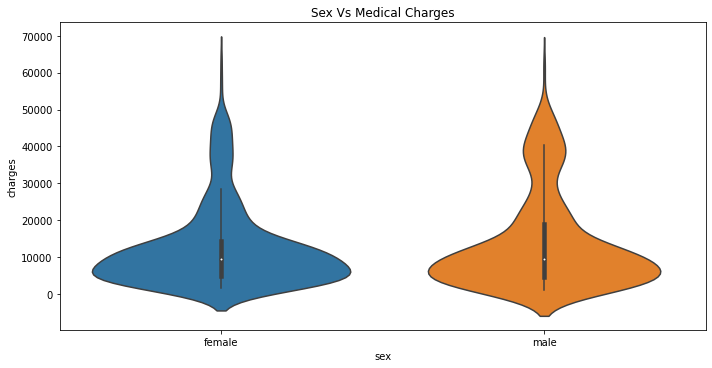

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='sex', y= 'charges', data=data)
plt.tight_layout()
plt.title("Sex Vs Medical Charges")



> Insurance charge for smokers is much wide range compare to non smokers

> There seems to be a strong correlation between smoking and medical charges, from the violin plot one can clearly make out the fact that a smoker nearly pays 4 times the medical expenses when compared to a non-smoker.






Text(0.5, 1.0, 'Somker Vs Medical Charges')

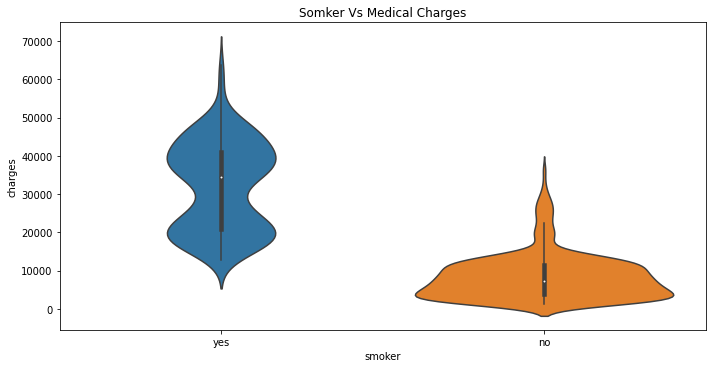

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='smoker', y= 'charges', data=data)

plt.tight_layout()
plt.title("Somker Vs Medical Charges")



> From the plot and the min-max-mean value for the medical charges table we can infer that the as the number of children increases, minimum charges increases  whereas in case for the maximum charge is shows the inverse trends. 

> Correlation between the number of children and charge shows a mild relation





Text(0.5, 1.0, 'Children vs Charges')

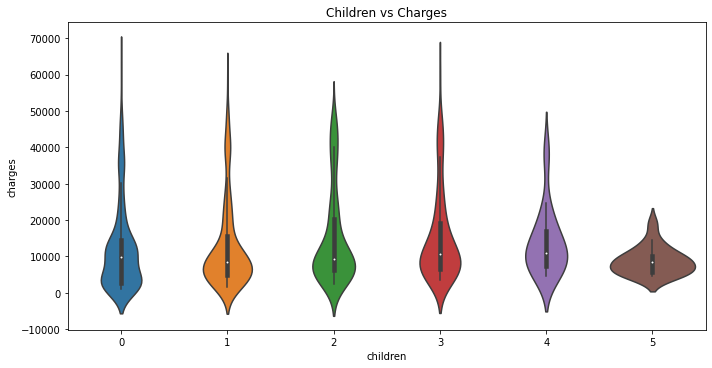

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='children', y= 'charges', data=data) 

plt.tight_layout()
plt.title("Children vs Charges")



> the region also seems to have no effect on the medical charges in any significant way



Text(0.5, 1.0, 'Region Vs Medical Charges')

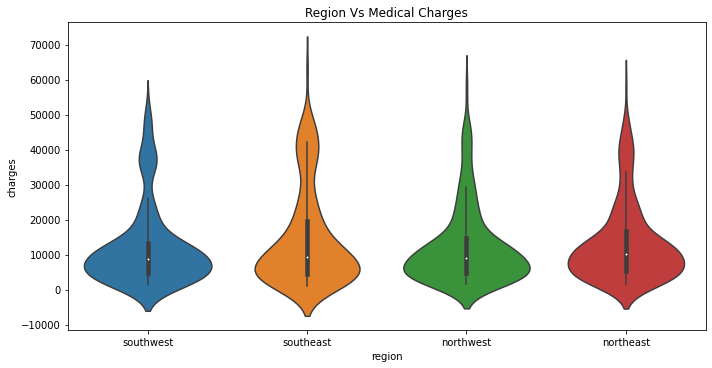

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='region',y='charges', data=data)

plt.tight_layout()
plt.title("Region Vs Medical Charges")



> In BMI vs charge, there seems to be no discernible pattern, but an increase in BMI seems to hold some correlation to charges



Text(0.5, 1.0, 'BMI Vs Medical Charges')

<Figure size 720x360 with 0 Axes>

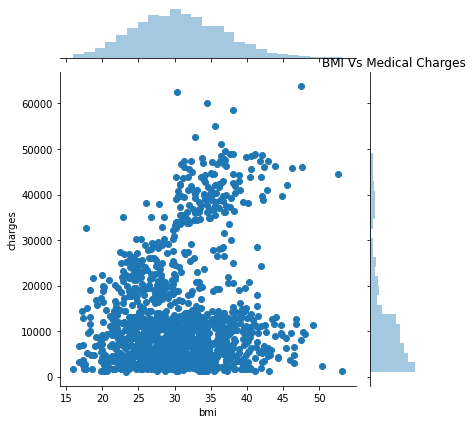

In [ ]:
plt.figure(figsize=(10,5))
sns.jointplot(x='bmi', y='charges', data=data)

plt.tight_layout()
plt.title("BMI Vs Medical Charges")

## Multivariate Analysis

### Comparison with respect to Sex as hue parameter


> From the above trend, for all the other independent variables taking category as SEX (hue), no significant correlation with respect to medical charges were obsereved 

> Both male and female trends look similar and have no effect on charges









Text(0.5, 1.0, 'Children Vs Medical Charges - Category- Sex')

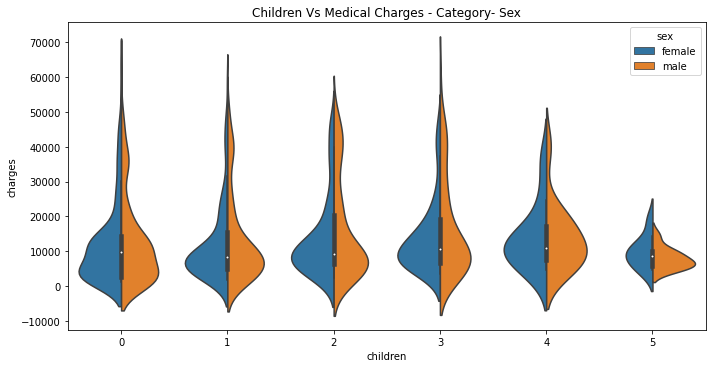

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='children', y= 'charges', data=data, hue='sex', split=True)
plt.tight_layout()
plt.title("Children Vs Medical Charges - Category- Sex")

Text(0.5, 1.0, 'Region Vs Medical Charges - Category- Sex')

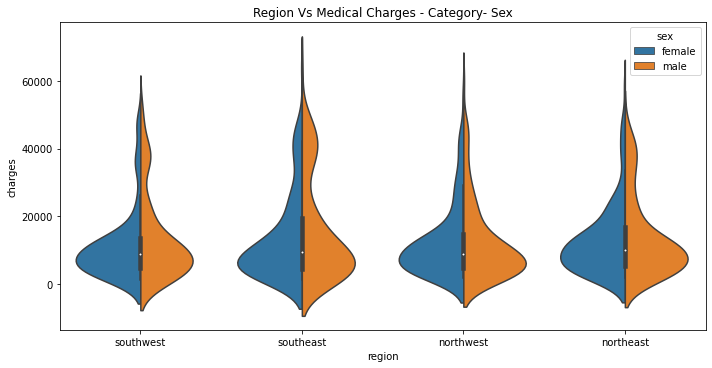

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='region', y= 'charges', data=data, hue='sex', split=True)

plt.tight_layout()
plt.title("Region Vs Medical Charges - Category- Sex")

Text(0.5, 1.0, 'Age Vs Medical Charges - Category- Sex')

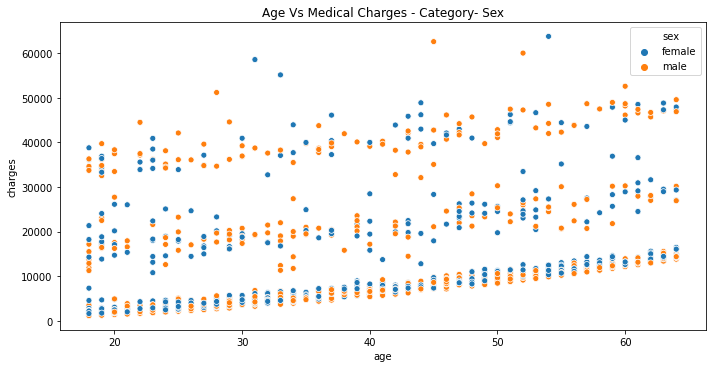

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y= 'charges', data=data, hue='sex')

plt.tight_layout()
plt.title("Age Vs Medical Charges - Category- Sex")

Text(0.5, 1.0, 'BMI Vs Medical Charges - Category- Sex')

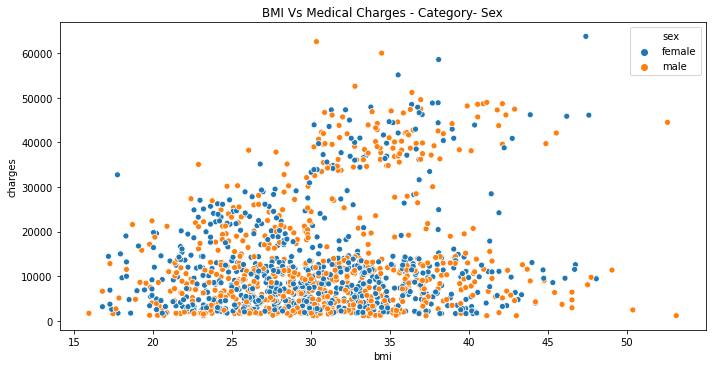

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y= 'charges', data=data, hue='sex')

plt.tight_layout()
plt.title("BMI Vs Medical Charges - Category- Sex")

### Comparison with respect to Smoker 


> From the above plots its significant that smokers vs non-smokers corrleation with the charges when analysed over other independent parameters



Text(0.5, 1.0, 'Region Vs Medical Charges - Category- Smoker')

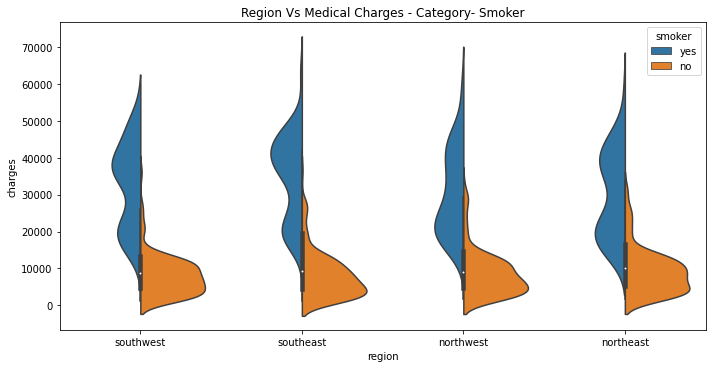

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='region', y= 'charges', data=data, hue='smoker', split=True)

plt.tight_layout()
plt.title("Region Vs Medical Charges - Category- Smoker")

Text(0.5, 1.0, 'No. of Children Vs Medical Charges - Category- Smoker')

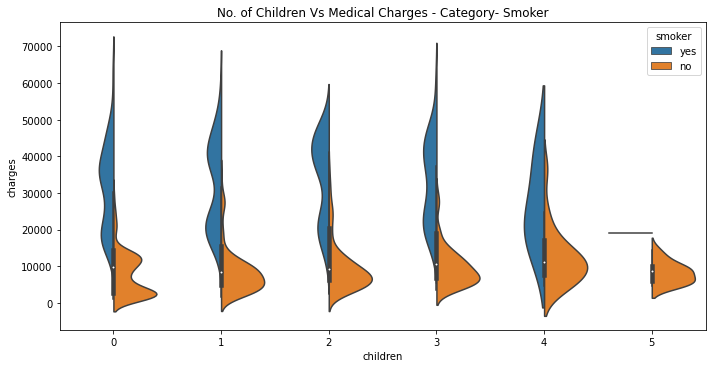

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='children', y= 'charges', data=data, hue='smoker', split=True)

plt.tight_layout()
plt.title("No. of Children Vs Medical Charges - Category- Smoker")

Text(0.5, 1.0, 'Age Vs Medical Charges - Category- Smoker')

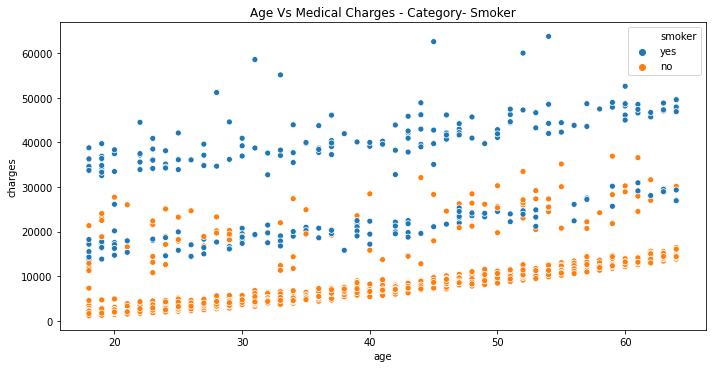

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y= 'charges', data=data, hue='smoker')

plt.tight_layout()
plt.title("Age Vs Medical Charges - Category- Smoker")

Text(0.5, 1.0, 'BMI Vs Medical Charges - Category- Smoker')

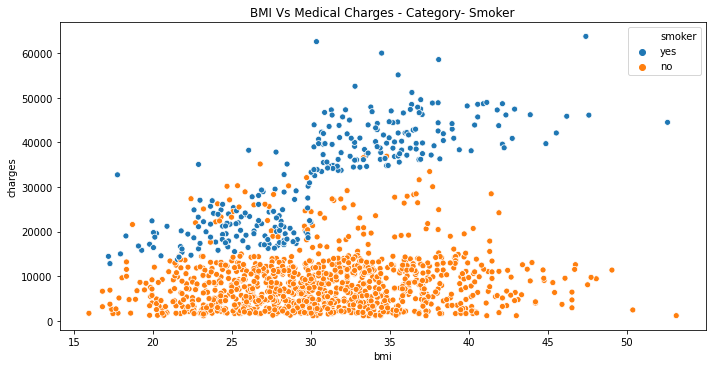

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y= 'charges', data=data, hue='smoker')

plt.tight_layout()
plt.title("BMI Vs Medical Charges - Category- Smoker")

### HeatMap


> A strong correlation can be observed between smoker attribute and charge from the heat map, which is followed by age and BMI. 



(4.5, -0.5)

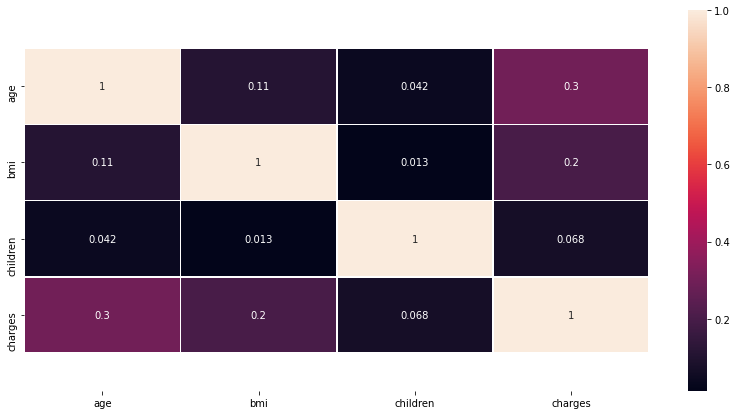

In [ ]:
plt.figure(figsize=(14,7))
df_corr = data.corr()
ax = sns.heatmap(df_corr, annot=True, linecolor='white', linewidths=0.8) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df_1 = df

## Data-Preprocessing 

### One-Hot Encoding

In [ ]:
#create object of StringIndexer class and specify input and output column
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# create object of StringIndexer class and specify input and output column
SI_sex = StringIndexer(inputCol='sex',outputCol='sex_index')
SI_smoker = StringIndexer(inputCol='smoker',outputCol='smoker_index')
SI_region = StringIndexer(inputCol='region',outputCol='region_index')

# transform the data
df = SI_sex.fit(df).transform(df)
df = SI_smoker.fit(df).transform(df)
df = SI_region.fit(df).transform(df)



In [ ]:
# create object and specify input and output column
OHE = OneHotEncoder(inputCols=['sex_index', 'smoker_index','region_index'],outputCols=['sex_OHE', 'smoker_OHE','region_OHE'])

# transform the data
df = OHE.fit(df).transform(df)

### Vector Assembler

In [ ]:
from pyspark.ml.feature import VectorAssembler

# specify the input and output columns of the vector assembler
assembler = VectorAssembler(inputCols=['age', 'bmi','children', 'sex_OHE', 'smoker_OHE', 'region_OHE'],
                           outputCol='features')
final_data = assembler.transform(df)

# view the transformed vector
final_data.select('features').show()


+--------------------+
|            features|
+--------------------+
|(8,[0,1,7],[19.0,...|
|[18.0,33.77,1.0,1...|
|[28.0,33.0,3.0,1....|
|[33.0,22.705,0.0,...|
|[32.0,28.88,0.0,1...|
|(8,[0,1,4,5],[31....|
|[46.0,33.44,1.0,0...|
|[37.0,27.74,3.0,0...|
|[37.0,29.83,2.0,1...|
|(8,[0,1,4,6],[60....|
|(8,[0,1,3,4],[25....|
|(8,[0,1,5],[62.0,...|
|[23.0,34.4,0.0,1....|
|(8,[0,1,4,5],[56....|
|(8,[0,1,3,5],[27....|
|[19.0,24.6,1.0,1....|
|(8,[0,1,2,4],[52....|
|(8,[0,1,3,4],[23....|
|[56.0,40.3,0.0,1....|
|(8,[0,1,3,7],[30....|
+--------------------+
only showing top 20 rows



### Train-test Split

In [ ]:
output = final_data.select(['features','charges']) 

In [ ]:
train_data,test_data= output.randomSplit([0.8,0.2])

In [ ]:
train_data.describe().show()

+-------+------------------+
|summary|           charges|
+-------+------------------+
|  count|              1075|
|   mean|13241.990715682807|
| stddev|12050.507065459688|
|    min|         1121.8739|
|    max|       63770.42801|
+-------+------------------+



In [ ]:
test_data.describe().show()

+-------+------------------+
|summary|           charges|
+-------+------------------+
|  count|               263|
|   mean|13386.634872243338|
| stddev|12372.894349704222|
|    min|         1135.9407|
|    max|       51194.55914|
+-------+------------------+



# Linear Regression

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='charges')

In [ ]:
trained_model = lr.fit(train_data)

In [ ]:
model_eval=trained_model.evaluate(test_data)

In [ ]:
print("RMSE: %f" % model_eval.rootMeanSquaredError)
print("r2: %f" % model_eval.r2)
print("r2adj: %f" % model_eval.r2adj)

RMSE: 5729.576574
r2: 0.784743
r2adj: 0.777963


# Generalized Linear Regression

In [ ]:
from pyspark.ml.regression import GeneralizedLinearRegression

In [ ]:
glr = GeneralizedLinearRegression(family='gaussian',labelCol='charges',featuresCol='features' )

In [ ]:
trained_model_glr = glr.fit(train_data)

In [ ]:
model_eval_glr=trained_model_glr.evaluate(test_data)

In [ ]:
summary = trained_model_glr.summary
print("Coefficient Standard Errors: " + str(summary.coefficientStandardErrors))
print("T Values: " + str(summary.tValues))
print("P Values: " + str(summary.pValues))
print("Dispersion: " + str(summary.dispersion))
print("Null Deviance: " + str(summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(summary.deviance))
print("Residual Degree Of Freedom: " + str(summary.residualDegreeOfFreedom))
print("AIC: " + str(summary.aic))
print("Deviance Residuals: ")
summary.residuals().show()

Coefficient Standard Errors: [13.67581258764827, 32.38273725067466, 155.2481870167816, 376.7109300271571, 470.3409759261834, 546.5447074266187, 542.3994740241056, 548.2666389625524, 1169.5197714298697]
T Values: [19.468884485019185, 10.368435851388952, 2.9435971071743814, -0.2409740607907396, -50.336424795204366, -1.807852458815429, -0.09298105572806442, -1.3674680605933305, 9.767601191381084]
P Values: [0.0, 0.0, 0.0033145401527290286, 0.8096215594378426, 0.0, 0.07091122502199454, 0.9259360827357237, 0.17176688355430447, 0.0]
Dispersion: 37768774.38383249
Null Deviance: 155960609854.2611
Residual Degree Of Freedom Null: 1074
Deviance: 40261513493.165436
Residual Degree Of Freedom: 1066
AIC: 21817.19769841938
Deviance Residuals: 
+-------------------+
|  devianceResiduals|
+-------------------+
| -9205.019503654883|
|-10131.340496082414|
|-10365.749457675976|
|  5660.752796749744|
|-10487.946926767545|
| -9448.915047811077|
|  7738.176498934488|
|-10577.672645353423|
|-10548.1663946068

## Decision Tree Regressor

In [ ]:
#create object of StringIndexer class and specify input and output column
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# create object of StringIndexer class and specify input and output column
SI_sex_dt = StringIndexer(inputCol='sex',outputCol='sex_index_dt')
OHE_sex_dt = OneHotEncoder(inputCol='sex_index_dt', outputCol='sex_OHE_dt')

SI_smoker_dt = StringIndexer(inputCol='smoker',outputCol='smoker_index_dt')
OHE_smoker_dt=OneHotEncoder(inputCol='smoker_index_dt', outputCol='smoker_OHE_dt')

SI_region_dt = StringIndexer(inputCol='region',outputCol='region_index_dt')
OHE_region_dt=OneHotEncoder(inputCol='region_index_dt', outputCol='region_OHE_dt')


In [ ]:
assmebler_dt=VectorAssembler(inputCols=['age', 'bmi', 'children','sex_OHE_dt', 'smoker_OHE_dt', 'region_OHE_dt'],
                             outputCol ='features_dt')

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
dtr = DecisionTreeRegressor(featuresCol='features_dt', labelCol='charges')

In [ ]:
pipeline_dt = Pipeline(stages=['SI_sex_dt','OHE_sex_dt','SI_smoker_dt','OHE_smoker_dt','SI_region_dt','OHE_region_dt','dtr'])

In [ ]:
my_col = df_1.select(['age','sex','bmi','children','smoker','region','charges'])

In [ ]:
train_data_dt,test_data_dt= my_col.randomSplit([0.8,0.2])

In [ ]:
fit_model_dt=pipeline.fit(train_data_dt)

In [ ]:
results_dt = fit_model_dt.transform(test_data_dt)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
results_dt.show()

+---+------+------+--------+------+---------+-----------+---------+-------------+------------+-------------+------------+-------------+--------------------+-------------------+
|age|   sex|   bmi|children|smoker|   region|    charges|sex_index|      sex_OHE|smoker_index|   smoker_OHE|region_index|   region_OHE|            features|         prediction|
+---+------+------+--------+------+---------+-----------+---------+-------------+------------+-------------+------------+-------------+--------------------+-------------------+
| 18|female|28.215|       0|    no|northeast| 2200.83085|      0.0|(1,[0],[1.0])|         0.0|(1,[0],[1.0])|         3.0|    (3,[],[])|[18.0,28.215,1.0,...|  2596.128674554182|
| 18|female| 31.35|       0|    no|southeast|  1622.1885|      0.0|(1,[0],[1.0])|         0.0|(1,[0],[1.0])|         0.0|(3,[0],[1.0])|[18.0,31.35,1.0,1...|  2392.775840399825|
| 18|female| 32.12|       2|    no|southeast|  2801.2588|      0.0|(1,[0],[1.0])|         0.0|(1,[0],[1.0])|       

In [ ]:
 predictions = results_dt.select('prediction','charges','features')

In [ ]:
evaluat = RegressionEvaluator(labelCol='charges',predictionCol='prediction',metricName='rmse')

In [ ]:
rmse=evaluat.evaluate(results_dt)
print ("Root Mean Squared Error (RMSE) on test data = $rmse",rmse)

Root Mean Squared Error (RMSE) on test data = $rmse 5788.4542862829285


# Thank You

## Link to doc 
### https://docs.google.com/document/d/1b1Qd2UbXtMguBzctKuGJsKgXSQi8q-eF6tLp1cTCxJM/edit?usp=sharing

## Link to PPT
### https://docs.google.com/presentation/d/1r4kUcvl__mzMYH8TULu2Lc80yB1yJPq-4a3UTSyQOE8/edit?usp=sharing
